# 1、資料匯入

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

print('Train shape:', train.shape) #Train shape: (1460, 81)
print('Test shape:', test.shape) #Test shape: (1459, 80)
print('Train cols:',train.columns) #與test set比較，多了'SalePrice'
print('Test cols:',test.columns)

train.head(5)

Train shape: (1460, 81)
Test shape: (1459, 80)
Train cols: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', '

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# 2、Explore the data 

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#target variable
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.88287575977


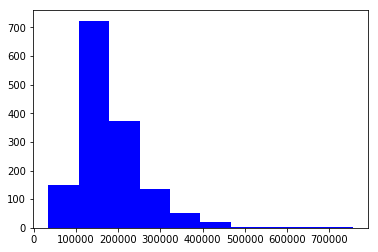

In [4]:
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

### The target variable is right skewed.  Log-transformation of the target variable.

Skew is: 0.121346619897


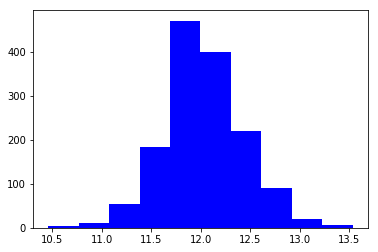

In [5]:
target = np.log1p(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

### 數值類的Feature進行corr分析

In [6]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [10]:
corr = numeric_features.corr()

print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


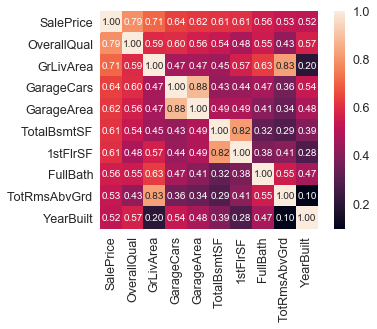

In [11]:
#correlation matrix
corr = train.corr()

k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [12]:
#OverallQual 
train.OverallQual.unique() #array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

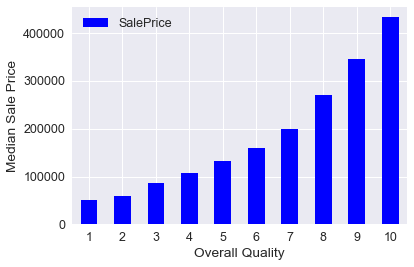

In [13]:
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

#與SalePrice呈正相關

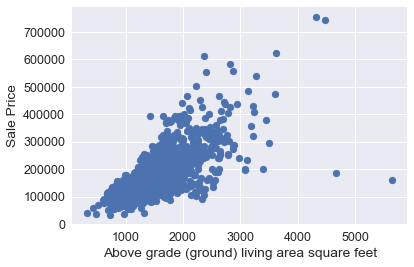

In [14]:
#GrLivArea 
plt.scatter(x=train.GrLivArea, y=train.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

In [7]:
#outlier delete
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

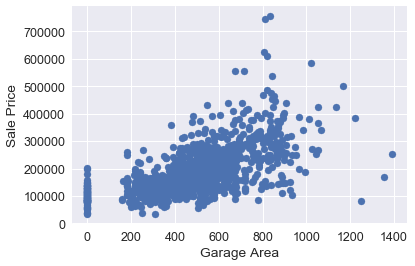

In [16]:
#GarageArea
#train.GarageArea.unique()
plt.scatter(x=train.GarageArea, y=train.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()


In [8]:
#outlier delete
train = train.drop(train[(train['GarageArea']>1200)&(train['SalePrice']<400000)].index)

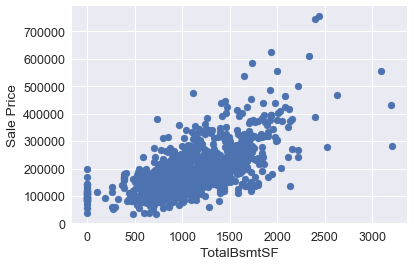

In [18]:
#TotalBsmtSF
#train.TotalBsmtSF.unique()
plt.scatter(x=train.TotalBsmtSF, y=train.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('TotalBsmtSF')
plt.show()


In [9]:
#outlier delete
train = train.drop(train[(train['TotalBsmtSF']>2500)&(train['SalePrice']<300000)].index)

# 3、Features engineering

In [10]:
#Target
target_log = np.log1p(train['SalePrice'])

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#concatenate the train and test data in the same dataframe
ntrain = train.shape[0]
ntest = test.shape[0]

all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['Id','SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape)) #all_data size is : (2919, 79)

all_data size is : (2911, 79)


### Missing Data

In [11]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.690828
MiscFeature,96.427345
Alley,93.198214
Fence,80.419100
FireplaceQu,48.746135
LotFrontage,16.660941
GarageQual,5.462041
GarageCond,5.462041
GarageFinish,5.462041
GarageYrBlt,5.462041


In [12]:
#PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")


#MiscFeature : data description says NA means "no misc feature"
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")


#Alley : data description says NA means "no alley access"
all_data["Alley"] = all_data["Alley"].fillna("None")


#Fence : data description says NA means "no fence"
all_data["Fence"] = all_data["Fence"].fillna("None")


#FireplaceQu : data description says NA means "no fireplace"
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")


#LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))


#GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
    

#GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
    

#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
    

#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    

#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

#Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
all_data = all_data.drop(['Utilities'], axis=1)


#Functional : data description says NA means typical
all_data["Functional"] = all_data["Functional"].fillna("Typ")


#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])


#KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])


#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])


#SaleType : Fill in again with most frequent which is "WD"
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])


#MSSubClass : Na most likely means No building class. We can replace missing values with None
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")


In [13]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


### Transforming some numerical variables that are really categorical

In [14]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

### Label Encoding some categorical variables that may contain information in their ordering set

In [16]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

#Adding one more important feature
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']


### Skewed features

In [17]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.926841
PoolArea,17.670290
LotArea,13.157883
LowQualFinSF,12.071863
3SsnPorch,11.360117
LandSlope,4.989775
KitchenAbvGr,4.295433
BsmtFinSF2,4.150440
EnclosedPorch,3.997699
ScreenPorch,3.940320


### Box Cox Transformation of (highly) skewed features

In [18]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


### Getting dummy categorical features

In [19]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2911, 220)


# 4、Modelling

In [20]:
# from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
# from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
# from sklearn.kernel_ridge import KernelRidge
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import RobustScaler
# from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
# from sklearn.model_selection import KFold, cross_val_score, train_test_split
# from sklearn.metrics import mean_squared_error

X = all_data[:ntrain]
test = all_data[ntrain:]
y = target_log.values

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
#Validation function
n_folds = 5

def rmsle_cv(model):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = cv))
    return(rmse.mean())

### Linear Regression (RMSE過大 不採用)

In [26]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)
predictions = lr.predict(X_test)
print ('MSE is:', mean_squared_error(y_test, predictions))

MSE is: 7.99672654025e+21


In [55]:
print('Average RMSE of Linear Regression ', rmsle_cv(lr))

Average RMSE of Linear Regression  38803928258.6


### Lasso Regularization

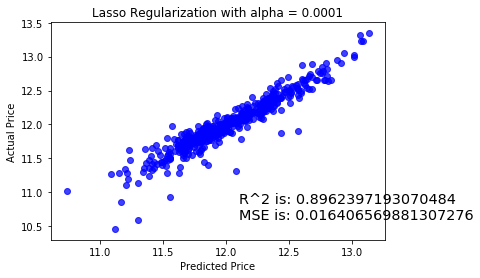

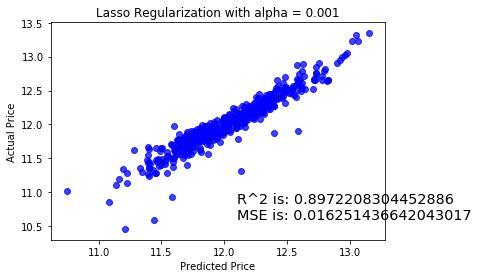

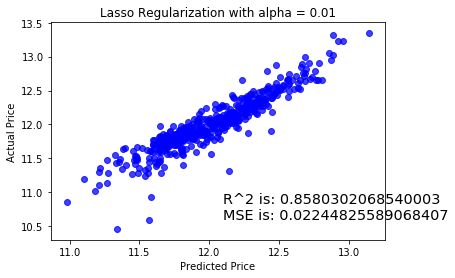

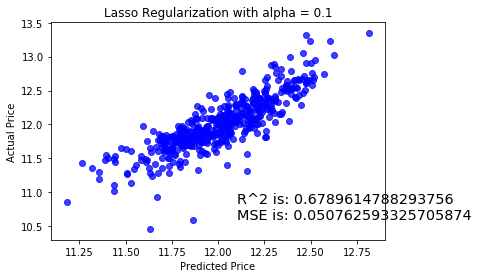

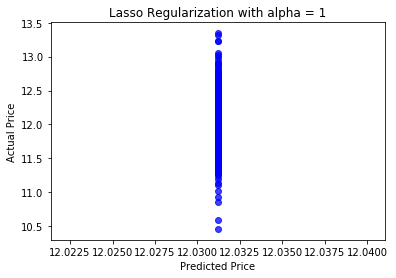

Average RMSE of Lasso Regression(L1)  0.115653980397


In [32]:
from sklearn.linear_model import Lasso

actual_values = y_test
for i in range (-4, 1):
    alpha = 10**i
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    preds_lasso = lasso_model.predict(X_test)
    
    plt.scatter(preds_lasso, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Lasso Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nMSE is: {}'.format(
                    lasso_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_lasso))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

#alpha =0.001, MSE=0.01625
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train, y_train)
print('Average RMSE of Lasso Regression(L1) ', rmsle_cv(lasso_model))

### Ridge Regularization 

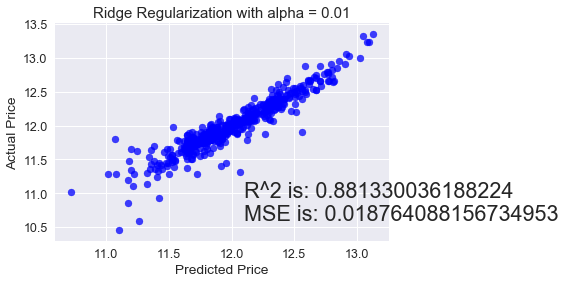

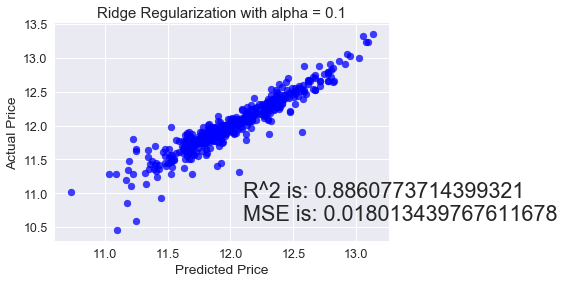

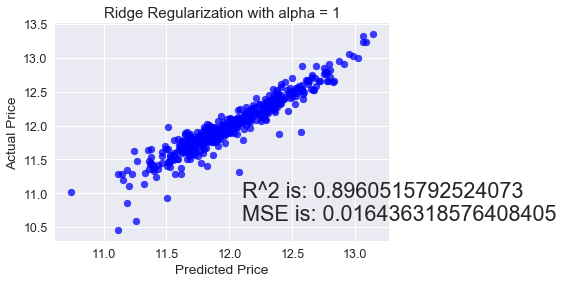

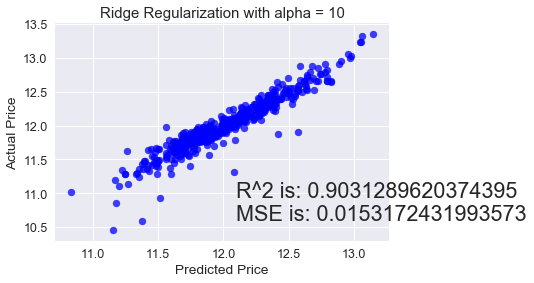

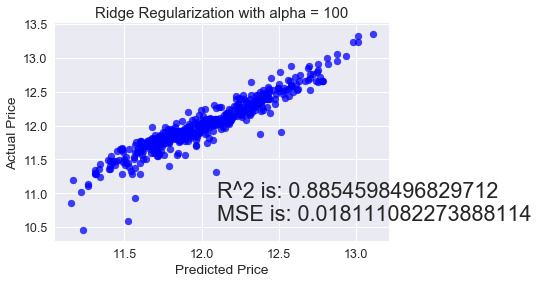

In [59]:
from sklearn.linear_model import Ridge
actual_values = y_test
for i in range (-2, 3):
    alpha = 10**i
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [60]:
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y_train)
print('Average RMSE of Ridge Regression(L2) ', rmsle_cv(ridge_model))

Average RMSE of Ridge Regression(L2)  0.1138707473


### SVR

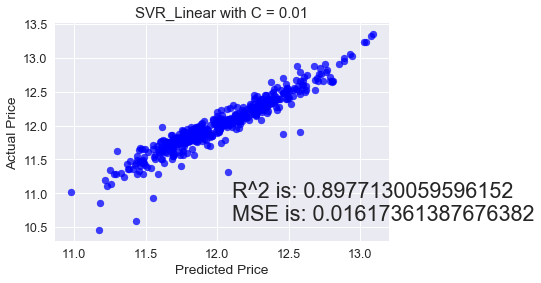

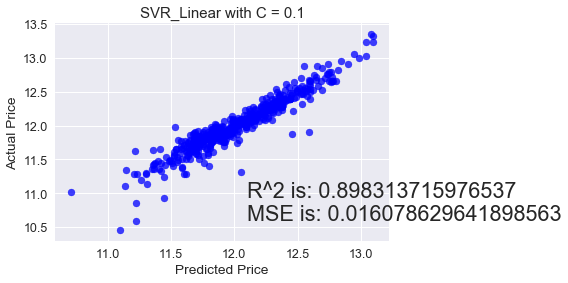

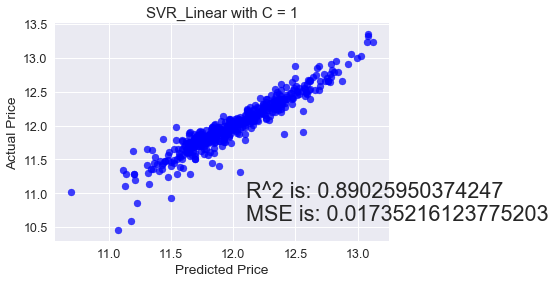

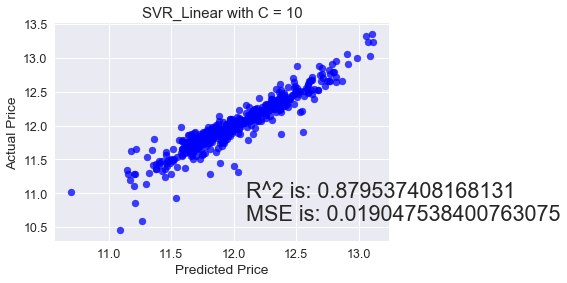

In [61]:
from sklearn.svm import SVR

#kernel=linear
actual_values = y_test
for i in range (-2, 2):
    c = 10**i       
    SVR_Linear_model = SVR(kernel='linear', C=c)
    SVR_Linear_model.fit(X_train, y_train)
    preds_SVR_Linear = SVR_Linear_model.predict(X_test)
    
    plt.scatter(preds_SVR_Linear, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('SVR_Linear with C = {}'.format(c))
    overlay = 'R^2 is: {}\nMSE is: {}'.format(
                    SVR_Linear_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_SVR_Linear))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [62]:
SVR_Linear_model = SVR(kernel='linear', C=0.1)
SVR_Linear_model.fit(X_train, y_train)
print('Average RMSE of SVR_Linear ', rmsle_cv(SVR_Linear_model))

Average RMSE of SVR_Linear  0.117907510339


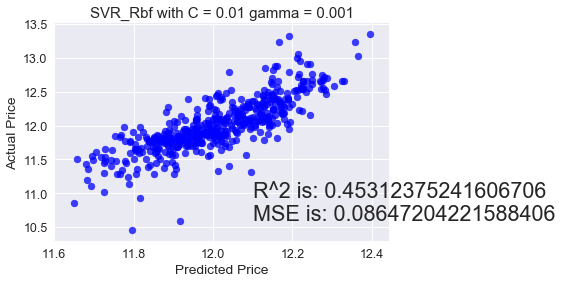

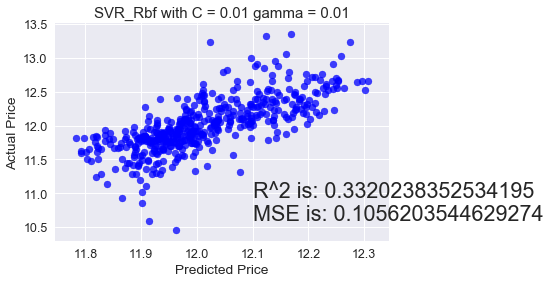

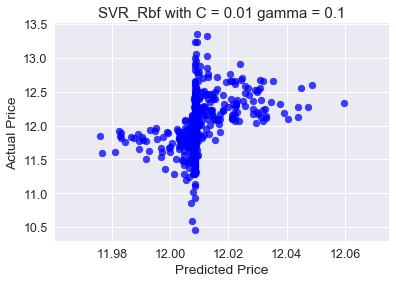

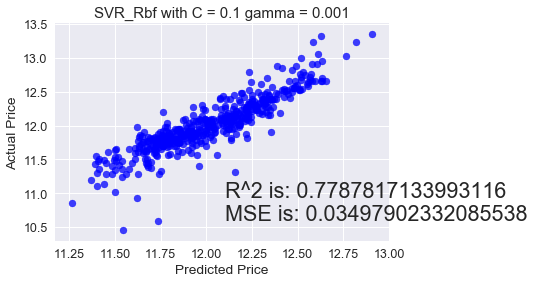

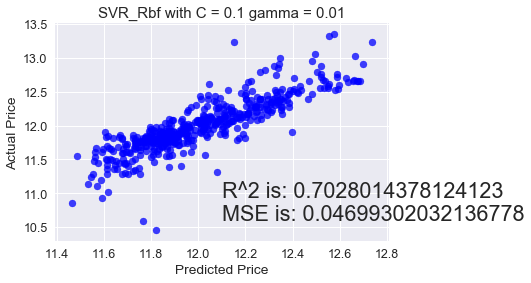

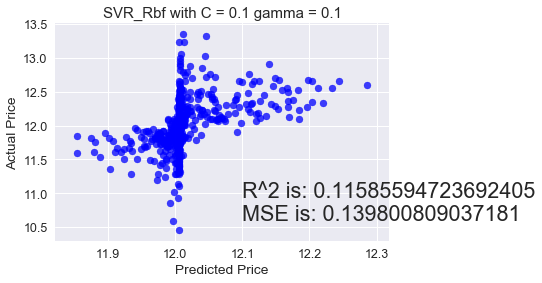

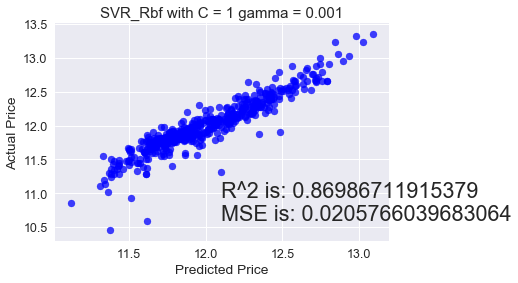

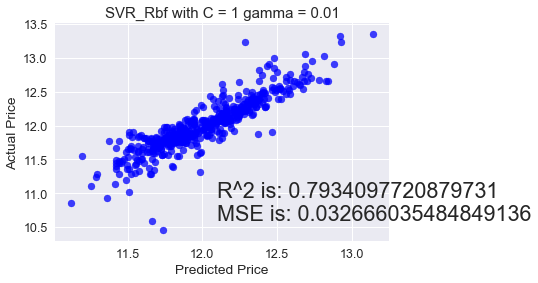

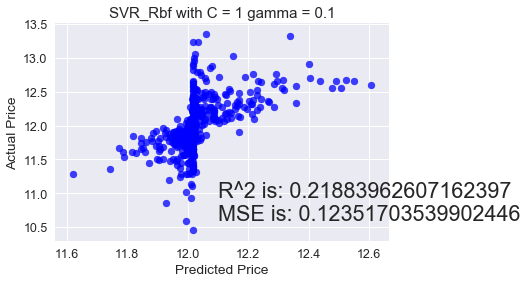

In [63]:
#kernel=rbf
actual_values = y_test
for i in range (-2,1):   
    c = 10**i
    for j in range (-3,0):       
        g = 10**j
        SVR_Rbf_model = SVR(kernel='rbf', C=c,gamma=g)
        SVR_Rbf_model.fit(X_train, y_train)
        preds_SVR_Rbf = SVR_Rbf_model.predict(X_test)    
        plt.scatter(preds_SVR_Rbf, actual_values, alpha=.75, color='b')
        plt.xlabel('Predicted Price')
        plt.ylabel('Actual Price')
        plt.title('SVR_Rbf with C = {0} gamma = {1}'.format(c,g))
        overlay = 'R^2 is: {}\nMSE is: {}'.format(
                SVR_Rbf_model.score(X_test, y_test),
                mean_squared_error(y_test, preds_SVR_Rbf))
        plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
        plt.show()

In [64]:
SVR_Rbf_model = SVR(kernel='rbf', C=1, gamma=0.01)
SVR_Rbf_model.fit(X_train, y_train) #MSE=0.03
print('Average RMSE of SVR_RBF ', rmsle_cv(SVR_Rbf_model)) #偏大

Average RMSE of SVR_RBF  0.178945829943


### RandomForestRegressor

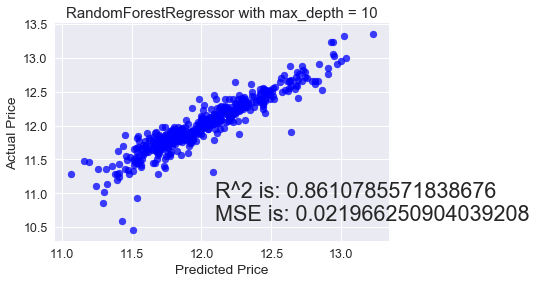

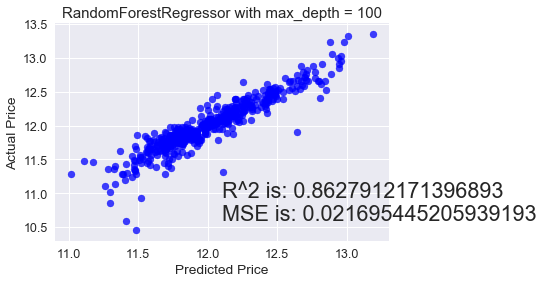

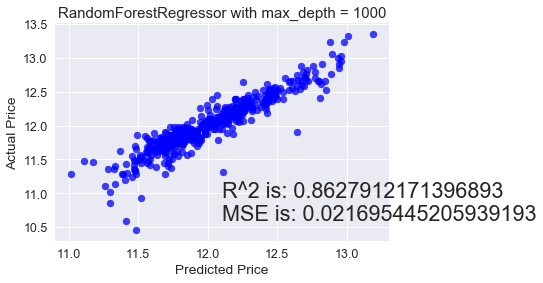

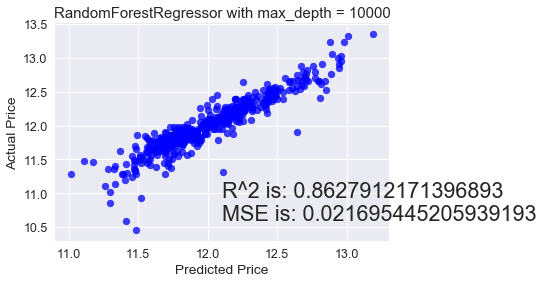

In [65]:
from sklearn.ensemble import RandomForestRegressor
actual_values = y_test
for i in range (1, 5):
    max_depth = 10**i
    regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)
    regr_rf.fit(X_train, y_train)
    preds_rf = regr_rf.predict(X_test)
    
    plt.scatter(preds_rf, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('RandomForestRegressor with max_depth = {}'.format(max_depth))
    overlay = 'R^2 is: {}\nMSE is: {}'.format(
                    regr_rf.score(X_test, y_test),
                    mean_squared_error(y_test, preds_rf))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [66]:
regr_rf=RandomForestRegressor(max_depth=100, random_state=2)
regr_rf.fit(X_train, y_train) #MSE=0.02169
print('Average RMSE of RandomForest ', rmsle_cv(regr_rf)) 

Average RMSE of RandomForest  0.145571606873


### XGBoost

In [27]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
import xgboost as xgb

model_xgb = xgb.XGBRegressor(colsample_bytree=0.5, gamma=0.05, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.8, n_estimators=2000,
                             reg_alpha=0.5, reg_lambda=0.8571,
                             subsample=0.5, silent=1,
                             random_state =7, nthread = -1)

model_xgb.fit(X_train, y_train)
preds = model_xgb.predict(X_test)

print('R^2 is: {}\nMSE is: {}'.format( model_xgb.score(X_test, y_test),  mean_squared_error(y_test, preds)) )

R^2 is: 0.8938184985639381
MSE is: 0.016789413172156313


In [28]:
print('Average RMSE of XGBRegressor ', rmsle_cv(model_xgb)) 

Average RMSE of XGBRegressor  0.11705414783


## Averaged base models class

In [71]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

In [77]:
averaged_models = AveragingModels(models = (lasso_model,ridge_model,SVR_Linear_model))
score = rmsle_cv(averaged_models)
score

0.11389248696342782

In [ ]:
#0.11137017056038725  lasso_model,ridge_model,SVR_Linear_model,model_xgb
#0.11389248696342782 lasso_model,ridge_model,SVR_Linear_model,

In [35]:
lasso_pred=np.expm1(lasso_model.predict(test))
#ridge_pred=np.expm1(ridge_model.predict(test))
# svr_pred=np.expm1(SVR_Linear_model.predict(test))
xgb_pred=np.expm1(model_xgb.predict(test))
ensemble = lasso_pred*0.3+ xgb_pred*0.7
#ensemble = lasso_pred*0.4+ridge_pred*0.4+svr_pred*0.1+xgb_pred*0.1


In [36]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)

In [102]:
sub2 = pd.DataFrame()
sub2['Id'] = test_ID
sub2['SalePrice'] = lasso_pred
sub2.to_csv('submission2.csv',index=False)

